# Air Quality Prediction System

Steps involved:-

Step 1 : fetch data

Step 2 : clean/prepare

Step 3 : feature matrix

step 4 : divide data into train and test datasets

Step 5 : apply machine learning model


#### Fetching the data

In [ ]:
#importing library packages and reading the csv file 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dfurl = "https://raw.githubusercontent.com/Palak-171/air_quality_data/main/dataset.csv"
df = pd.read_csv(dfurl)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#checking dimensions of data
df.shape

(435742, 13)

In [ ]:
#basic information of data 

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [ ]:
#printing first 5 rows
df.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


In [ ]:
#printing last 10 rows
df.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,9/12/2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/9/2015
435733,SAMP,12/12/2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/12/2015
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/15/2015
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/18/2015
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/21/2015
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#How many states/union territories data is being represented in this data set?
df['state'].nunique()

37

In [ ]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [ ]:
# number of locations in data
df['location'].nunique()


304

In [ ]:
df['location'].unique()

array(['Hyderabad', 'Vishakhapatnam', 'Visakhapatnam', 'Tirupati',
       'Vijayawada', 'Patancheru', 'Ramagundam', 'Kurnool', 'Guntur',
       'Nalgonda', 'Nellore', 'Warangal', 'Chittoor', 'Khammam',
       'Kakinada', 'Ananthapur', 'Eluru', 'Kadapa', 'Karimnagar',
       'Nizamabad', 'Ongole', 'Rajahmundry', 'Sangareddy', 'Srikakulam',
       'Vizianagaram', 'Itanagar', 'Naharlagun', 'Guwahati', 'Bongaigaon',
       'Dibrugarh', 'Golaghat', 'Hailakandi', 'Sibsagar', 'Tezpur',
       'Silchar', 'Daranga', 'Lakhimpur', 'Nagaon', 'Nalbari',
       'Sivasagar', 'Silcher', 'Tinsukia', 'Margherita', 'Sindri',
       'Jharia', 'Dhanbad', 'Jamshedpur', 'Patna', 'Chandigarh', 'Korba',
       'Bhilai Nagar', 'Raipur', 'Bhilai', 'Bilaspur', 'Daman',
       'Silvassa', 'Khadoli', 'Daman Diu & Nagar', 'Delhi', 'Ponda',
       'Vasco', 'Panjim', 'Panaji', 'Mormugao', 'Amona', 'Assanora',
       'Bicholim', 'Codli', 'Curchorem', 'Honda', 'Usgao', 'Kundaim',
       'Mapusa', 'Margao', 'Sanguem', 'T

#### Visualization of states with highest pollutants

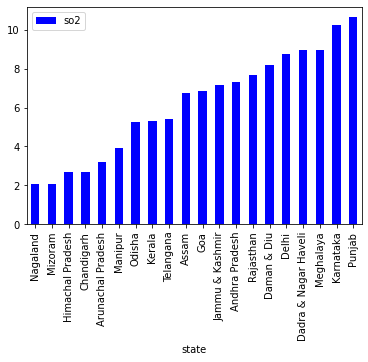

In [ ]:
#so2
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').head(20).plot.bar(color='b')
plt.show()

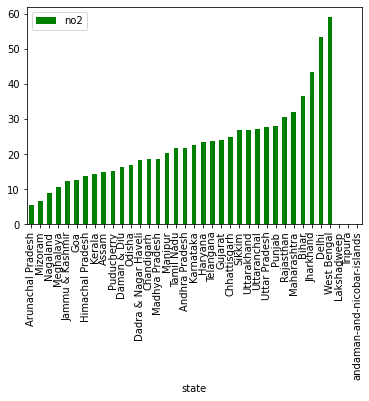

In [ ]:
#no2
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='g')
plt.show()

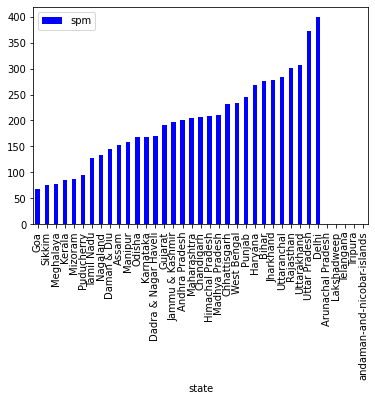

In [ ]:
#spm
df[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').plot.bar(color='b')
plt.show()

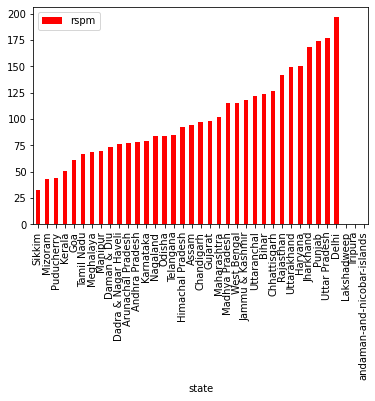

In [ ]:
#rspm
df[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='r')
plt.show()

#### Cleaning and preparing the data

In [ ]:
#printing the sum of null values for each columns
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [ ]:
#dropping unnecessary columns
df =df.drop(columns=['stn_code','agency','sampling_date','location_monitoring_station','pm2_5','type'])

In [ ]:
df.head()

,state,location,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,4.8,17.4,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,3.1,7.0,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,6.2,28.5,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,6.3,14.7,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,4.7,7.5,NaN,NaN,3/1/1990


In [ ]:
#CALCULATE TOTAL MISSING VALUES AND THEIR PERCENTAGE
totalnull = df.isnull().sum().sort_values(ascending=False)

In [ ]:
totalnull.head(10)

spm         237387
rspm         40222
so2          34646
no2          16233
date             7
location         3
state            0
dtype: int64

In [ ]:

percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)  #count(returns Non-NAN value)

In [ ]:
missing_data = pd.concat([totalnull, percent], axis=1, keys=['Total', 'Percent'])


In [ ]:
missing_data.head()

,Total,Percent
spm,237387,54.478797
rspm,40222,9.230692
so2,34646,7.951035
no2,16233,3.725370
date,7,0.001606


Text(0.5, 1.0, 'Percent missing data by feature')

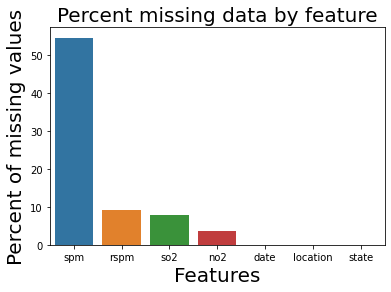

In [ ]:
#missing values bar plot
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

In [ ]:
#mean distribution by states
df.groupby('state')[['spm','rspm','so2','no2']].mean()

,spm,rspm,so2,no2
state,,,,
Andhra Pradesh,200.260378,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,76.629213,3.179104,5.469697
Assam,153.355386,93.724912,6.723263,14.793691
Bihar,276.917416,123.705176,19.381476,36.575525
Chandigarh,206.056150,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,76.536530,8.939587,18.293959
Daman & Diu,145.681416,73.749431,8.192958,16.168926
Delhi,399.402088,196.639771,8.737273,53.489147


Checking Data Distribution

(array([2.54951e+05, 1.27940e+05, 3.17190e+04, 9.87300e+03, 3.38500e+03,
        1.44100e+03, 7.93000e+02, 4.30000e+02, 4.09000e+02, 1.62000e+02]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

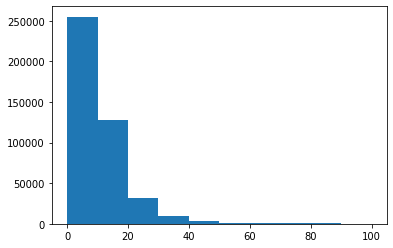

In [ ]:
#data distribution of so2
plt.hist(df.so2,range=(0,100)) 

(array([1.88664e+05, 1.80328e+05, 4.38890e+04, 1.13920e+04, 4.12600e+03,
        1.76700e+03, 7.77000e+02, 3.04000e+02, 1.55000e+02, 9.30000e+01]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

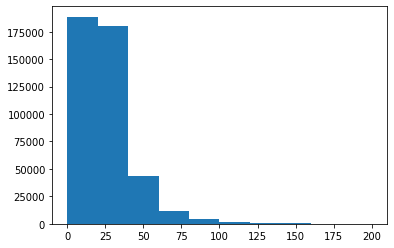

In [ ]:
#data distribution of no2
plt.hist(df.no2,range=(0,200)) 

(array([1.12945e+05, 2.34749e+05, 6.80050e+04, 1.15780e+04, 2.83300e+03,
        1.00600e+03, 3.82000e+02, 9.40000e+01, 4.20000e+01, 1.30000e+01]),
 array([   0.,  150.,  300.,  450.,  600.,  750.,  900., 1050., 1200.,
        1350., 1500.]),
 <a list of 10 Patch objects>)

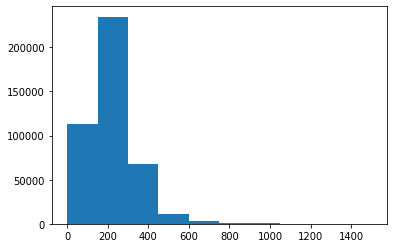

In [ ]:
#data distribution of spm
plt.hist(df.spm,range=(0,1500)) 

(array([1.43219e+05, 1.73494e+05, 7.66130e+04, 2.61610e+04, 7.56400e+03,
        2.77900e+03, 1.02300e+03, 4.42000e+02, 2.07000e+02, 7.60000e+01]),
 array([  0.,  70., 140., 210., 280., 350., 420., 490., 560., 630., 700.]),
 <a list of 10 Patch objects>)

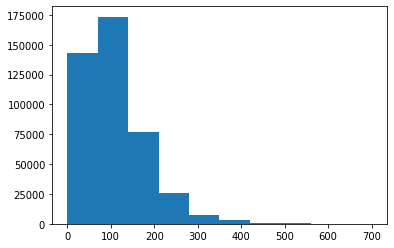

In [ ]:
#data distribution of rspm
plt.hist(df.rspm,range=(0,700)) 

CONCLUSION:- NO POTENTIAL OUTLIERS

 ##### Fill Missing Values by Mean (group by state)

In [ ]:
grp_state = df.groupby('state')

In [ ]:
def impute_mean_by_state(series):
    return series.fillna(series.mean())

In [ ]:
#fill value with mean value group by state
df['rspm']=grp_state['rspm'].transform(impute_mean_by_state)  
df['so2']=grp_state['so2'].transform(impute_mean_by_state)
df['no2']=grp_state['no2'].transform(impute_mean_by_state)
df['spm']=grp_state['spm'].transform(impute_mean_by_state)

In [ ]:
df.describe()

,so2,no2,rspm,spm
count,435739.000000,435739.000000,435739.000000,431671.000000
mean,10.589141,25.663170,109.680907,215.198748
std,10.863679,18.271145,72.519399,117.470157
min,0.000000,0.000000,0.000000,0.000000
25%,4.800000,14.000000,59.000000,142.000000
50%,8.000000,21.800000,93.000000,205.255823
75%,13.000000,32.000000,142.016832,248.000000
max,909.000000,876.000000,6307.033333,3380.000000


In [ ]:
 #some null value remains since some state have one value(i.e NaN only) and no mean to replace them
 df.isnull().sum()

state          0
location       3
so2            3
no2            3
rspm           3
spm         4071
date           7
dtype: int64

In [ ]:
df.tail()

,state,location,so2,no2,rspm,spm,date
435737,West Bengal,ULUBERIA,22.0,50.0,143.0,233.506524,12/24/2015
435738,West Bengal,ULUBERIA,20.0,46.0,171.0,233.506524,12/29/2015
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN
435741,Tripura,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Remove the rows with null values in spm
df=df.dropna(subset=['spm'])

In [ ]:
# to check all null values are removed or not
df.isnull().sum() 

state       0
location    0
so2         0
no2         0
rspm        0
spm         0
date        4
dtype: int64

In [ ]:
df.tail()

,state,location,so2,no2,rspm,spm,date
435734,West Bengal,ULUBERIA,20.0,44.0,148.0,233.506524,12/15/2015
435735,West Bengal,ULUBERIA,17.0,44.0,131.0,233.506524,12/18/2015
435736,West Bengal,ULUBERIA,18.0,45.0,140.0,233.506524,12/21/2015
435737,West Bengal,ULUBERIA,22.0,50.0,143.0,233.506524,12/24/2015
435738,West Bengal,ULUBERIA,20.0,46.0,171.0,233.506524,12/29/2015


#### Data Distribution after Replacing Null value with mean

(array([2.54951e+05, 1.27940e+05, 3.17190e+04, 9.87300e+03, 3.38500e+03,
        1.44100e+03, 7.93000e+02, 4.30000e+02, 4.09000e+02, 1.62000e+02]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

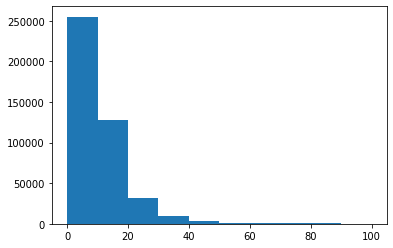

In [ ]:
#so2
plt.hist(df.so2,range=(0,100))

(array([1.88664e+05, 1.80328e+05, 4.38890e+04, 1.13920e+04, 4.12600e+03,
        1.76700e+03, 7.77000e+02, 3.04000e+02, 1.55000e+02, 9.30000e+01]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

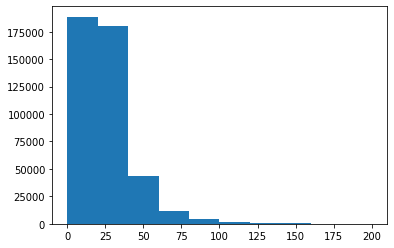

In [ ]:
#no2
plt.hist(df.no2,range=(0,200))

(array([1.12945e+05, 2.34749e+05, 6.80050e+04, 1.15780e+04, 2.83300e+03,
        1.00600e+03, 3.82000e+02, 9.40000e+01, 4.20000e+01, 1.30000e+01]),
 array([   0.,  150.,  300.,  450.,  600.,  750.,  900., 1050., 1200.,
        1350., 1500.]),
 <a list of 10 Patch objects>)

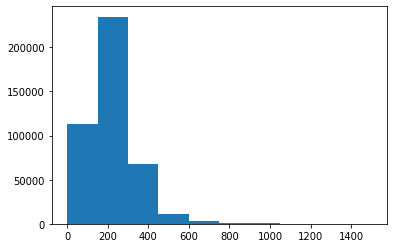

In [ ]:
#spm
plt.hist(df.spm,range=(0,1500))

(array([1.43219e+05, 1.73494e+05, 7.66130e+04, 2.61610e+04, 7.56400e+03,
        2.77900e+03, 1.02300e+03, 4.42000e+02, 2.07000e+02, 7.60000e+01]),
 array([  0.,  70., 140., 210., 280., 350., 420., 490., 560., 630., 700.]),
 <a list of 10 Patch objects>)

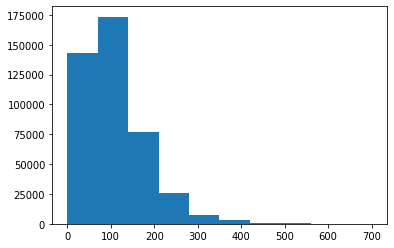

In [ ]:
#rspm
plt.hist(df.rspm,range=(0,700))

### AIR QUALITY INDEX FORMULA

The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used$$\begin{equation*}
I = I_{low} +  \frac{I_{high}-I_{low}}{C_{high}-C_{low}}{(C-C_{low})}
\end{equation*}$$


 Based on the measured ambient concentrations, corresponding standards and likely health impact, a sub-index is calculated for each of these pollutants.The worst sub-index reflects overall AQI.If multiple pollutants are measured at a monitoring site, then the largest or "dominant" AQI value is reported for the location.

In [ ]:
# calculating aqi from so2, no2, spm, rspm
def cal_aqi(so2,no2,rspm,spm):
    aqi=0
    if(so2>no2 and so2>rspm and so2>spm):
     aqi=so2
    if(no2>so2 and no2>rspm and no2>spm):
     aqi=no2
    if(rspm>so2 and rspm>no2 and rspm>spm):
     aqi=rspm
    if(spm>so2 and spm>no2 and spm>rspm):
     aqi=spm
    return aqi
df['AQI']=df.apply(lambda x:cal_aqi(x['so2'],x['no2'],x['rspm'],x['spm']),axis=1)
dfaq= df[['state', 'location', 'so2', 'no2', 'rspm', 'spm','AQI']]
dfaq.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,state,location,so2,no2,rspm,spm,AQI
0,Andhra Pradesh,Hyderabad,4.8,17.4,78.182824,200.260378,200.260378
1,Andhra Pradesh,Hyderabad,3.1,7.0,78.182824,200.260378,200.260378
2,Andhra Pradesh,Hyderabad,6.2,28.5,78.182824,200.260378,200.260378
3,Andhra Pradesh,Hyderabad,6.3,14.7,78.182824,200.260378,200.260378
4,Andhra Pradesh,Hyderabad,4.7,7.5,78.182824,200.260378,200.260378




AQI RANGE for corresponding AQI value

In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
df.head(15)

,state,location,so2,no2,rspm,spm,date,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,4.8,17.4,78.182824,200.260378,2/1/1990,200.260378,Unhealthy
1,Andhra Pradesh,Hyderabad,3.1,7.0,78.182824,200.260378,2/1/1990,200.260378,Unhealthy
2,Andhra Pradesh,Hyderabad,6.2,28.5,78.182824,200.260378,2/1/1990,200.260378,Unhealthy
3,Andhra Pradesh,Hyderabad,6.3,14.7,78.182824,200.260378,3/1/1990,200.260378,Unhealthy
4,Andhra Pradesh,Hyderabad,4.7,7.5,78.182824,200.260378,3/1/1990,200.260378,Unhealthy
5,Andhra Pradesh,Hyderabad,6.4,25.7,78.182824,200.260378,3/1/1990,200.260378,Unhealthy
6,Andhra Pradesh,Hyderabad,5.4,17.1,78.182824,200.260378,4/1/1990,200.260378,Unhealthy
7,Andhra Pradesh,Hyderabad,4.7,8.7,78.182824,200.260378,4/1/1990,200.260378,Unhealthy
8,Andhra Pradesh,Hyderabad,4.2,23.0,78.182824,200.260378,4/1/1990,200.260378,Unhealthy
9,Andhra Pradesh,Hyderabad,4.0,8.9,78.182824,200.260378,5/1/1990,200.260378,Unhealthy


In [ ]:
df.tail(5)

,state,location,so2,no2,rspm,spm,date,AQI,AQI_Range
435734,West Bengal,ULUBERIA,20.0,44.0,148.0,233.506524,12/15/2015,233.506524,Unhealthy
435735,West Bengal,ULUBERIA,17.0,44.0,131.0,233.506524,12/18/2015,233.506524,Unhealthy
435736,West Bengal,ULUBERIA,18.0,45.0,140.0,233.506524,12/21/2015,233.506524,Unhealthy
435737,West Bengal,ULUBERIA,22.0,50.0,143.0,233.506524,12/24/2015,233.506524,Unhealthy
435738,West Bengal,ULUBERIA,20.0,46.0,171.0,233.506524,12/29/2015,233.506524,Unhealthy



## Build Model - Using Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X1 = df[['so2','no2','rspm','spm']]
print(X1)

y1 = df['AQI_Range']
print(y1)

         so2   no2        rspm         spm
0        4.8  17.4   78.182824  200.260378
1        3.1   7.0   78.182824  200.260378
2        6.2  28.5   78.182824  200.260378
3        6.3  14.7   78.182824  200.260378
4        4.7   7.5   78.182824  200.260378
...      ...   ...         ...         ...
435734  20.0  44.0  148.000000  233.506524
435735  17.0  44.0  131.000000  233.506524
435736  18.0  45.0  140.000000  233.506524
435737  22.0  50.0  143.000000  233.506524
435738  20.0  46.0  171.000000  233.506524

[431671 rows x 4 columns]
0         Unhealthy
1         Unhealthy
2         Unhealthy
3         Unhealthy
4         Unhealthy
            ...    
435734    Unhealthy
435735    Unhealthy
435736    Unhealthy
435737    Unhealthy
435738    Unhealthy
Name: AQI_Range, Length: 431671, dtype: object


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
X_train1.head()

,so2,no2,rspm,spm
313797,11.00,27.00,140.000000,244.918926
413899,31.20,49.30,115.039909,106.000000
32796,5.00,9.00,30.000000,153.355386
142440,4.50,24.10,52.000000,176.000000
388697,26.75,34.25,189.000000,395.000000


In [ ]:
y_train1.head()

313797         Unhealthy
413899              Poor
32796               Poor
142440              Poor
388697    Very unhealthy
Name: AQI_Range, dtype: object

In [ ]:
model.score(X_test1,y_test1) #high accuracy score of 99.97 %


0.9997964226546486

In [ ]:
model.predict([[2.059,8.94,102,256]]) #correct

array(['Unhealthy'], dtype=object)

In [ ]:
model.predict([[100,182.2,78.182,400]]) #correct

array(['Very unhealthy'], dtype=object)

In [ ]:
model.predict([[32.7,35,78.182,203]]) #correct


array(['Unhealthy'], dtype=object)

## Build Model - Using Decision Tree Classifier


In [ ]:
from sklearn import tree

In [ ]:
model2 = tree.DecisionTreeClassifier()

In [ ]:
model2.fit(X_train1,y_train1)
            

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model2.score(X_test1,y_test1) #high accuracy score of 99.98%

0.9997753629292674

In [ ]:
#Some predictions
model2.predict([[9,31,51,205.25]]) # correct

array(['Unhealthy'], dtype=object)

In [ ]:
model2.predict([[2,5.8,17,36]]) # correct

array(['Good'], dtype=object)

In [ ]:
model2.predict([[6,11,109,84.41]]) # correct

array(['Poor'], dtype=object)

In [ ]:
model2.predict([[10,16,156,372.66]]) # correct

array(['Very unhealthy'], dtype=object)

#### Conclusion

1. AQI is highly correlated with all the independent variables(so2, no2, rspm, spm)

2. AQI has been increasing over the years.

## Saving model using pickle


In [ ]:
# saving the model on Hard disk
import pickle

pickle.dump(model2, open('DTModel.pkl', 'wb') , protocol=2)

#pickle.dump(model, open('RFmodel.pkl', 'wb') , protocol=2)

In [ ]:
#using the model saved from hard disk 
import pickle 
# load the model from disk
filename = 'DTModel.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
P =[[9,31,51,205.25]]
print(loaded_model.predict(P))
P2 =[[2,5.8,17,36]]
print(loaded_model.predict(P2))
P3 = [[90.3,85.2,34.7,45.8]]
print(loaded_model.predict(P3))

['Unhealthy']
['Good']
['Moderate']
